largely according to https://www.kaggle.com/code/ambrosm/tpsmay22-eda-which-makes-sense/notebook

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

id      f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
0   0 -1.373246  0.238887 -0.243376  0.567405 -0.647715  0.839326  0.113133   
1   1  1.697021 -1.710322 -2.230332 -0.545661  1.113173 -1.552175  0.447825   
2   2  1.681726  0.616746 -1.027689  0.810492 -0.609086  0.113965 -0.708660   
3   3 -0.118172 -0.587835 -0.804638  2.086822  0.371005 -0.128831 -0.282575   
4   4  1.148481 -0.176567 -0.664871 -1.101343  0.467875  0.500117  0.407515   

   f_07  f_08  ...      f_22      f_23      f_24      f_25      f_26  \
0     1     5  ... -2.540739  0.766952 -2.730628 -0.208177  1.363402   
1     1     3  ...  2.278315 -0.633658 -1.217077 -3.782194 -0.058316   
2     1     0  ... -1.385775 -0.520558 -0.009121  2.788536 -3.703488   
3     3     2  ...  0.572594 -1.653213  1.686035 -2.533098 -0.608601   
4     3     3  ... -3.912929 -1.430366  2.127649 -3.306784  4.371371   

         f_27        f_28  f_29  f_30  target  
0  ABABDADBAB   67.609153     0     0       0  
1  ACACCADCEB  377.096415     0     0       1  
2  AAAEABCKAD -195.599702     0     2       1  
3  BDBBAACBCB  210.826205     0     0       1  
4  BDBCBBCHFE -217.211798     0     1       1  

[5 rows x 33 columns]

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-null  float64
 21  f_20    90

In [5]:
train.drop(columns=['f_27']).corrwith(train['target'])

id        0.000184
f_00      0.055274
f_01      0.055011
f_02      0.031814
f_03     -0.000192
f_04      0.000159
f_05      0.033048
f_06     -0.000965
f_07      0.005257
f_08      0.035829
f_09      0.067909
f_10     -0.035420
f_11     -0.078525
f_12     -0.000962
f_13     -0.034092
f_14     -0.017588
f_15      0.043297
f_16     -0.037303
f_17      0.001832
f_18     -0.010781
f_19     -0.087698
f_20     -0.036599
f_21      0.130887
f_22      0.065554
f_23      0.081206
f_24      0.086350
f_25     -0.032836
f_26      0.058915
f_28      0.035824
f_29      0.051306
f_30      0.020721
target    1.000000
dtype: float64

<AxesSubplot:xlabel='Count', ylabel='f_21'>

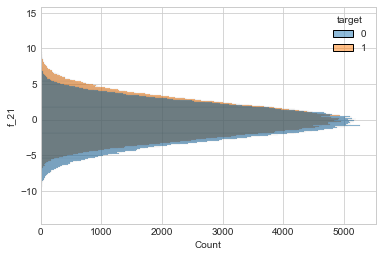

In [20]:
sns.histplot(y='f_21', data=train.drop(columns=['f_27']), hue='target')

In [25]:
def plot_distribution_withtarget(data, target, col_cat=[], cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = int(np.ceil(float(data.shape[1])/cols))
    for idx, col in enumerate(data.columns):
        ax = fig.add_subplot(rows, cols, idx+1)
        ax.set_title(col)
        if col in col_cat:
            g = sns.countplot(y=col, hue=target, data=data) 
        else:
#             g = sns.scatterplot(x=col, y=np.random.uniform(-1,1,data.shape[0]), hue=target, data=data)
            g = sns.histplot(data=data, x=col, hue=target)
        ax.legend([],[],frameon=False)

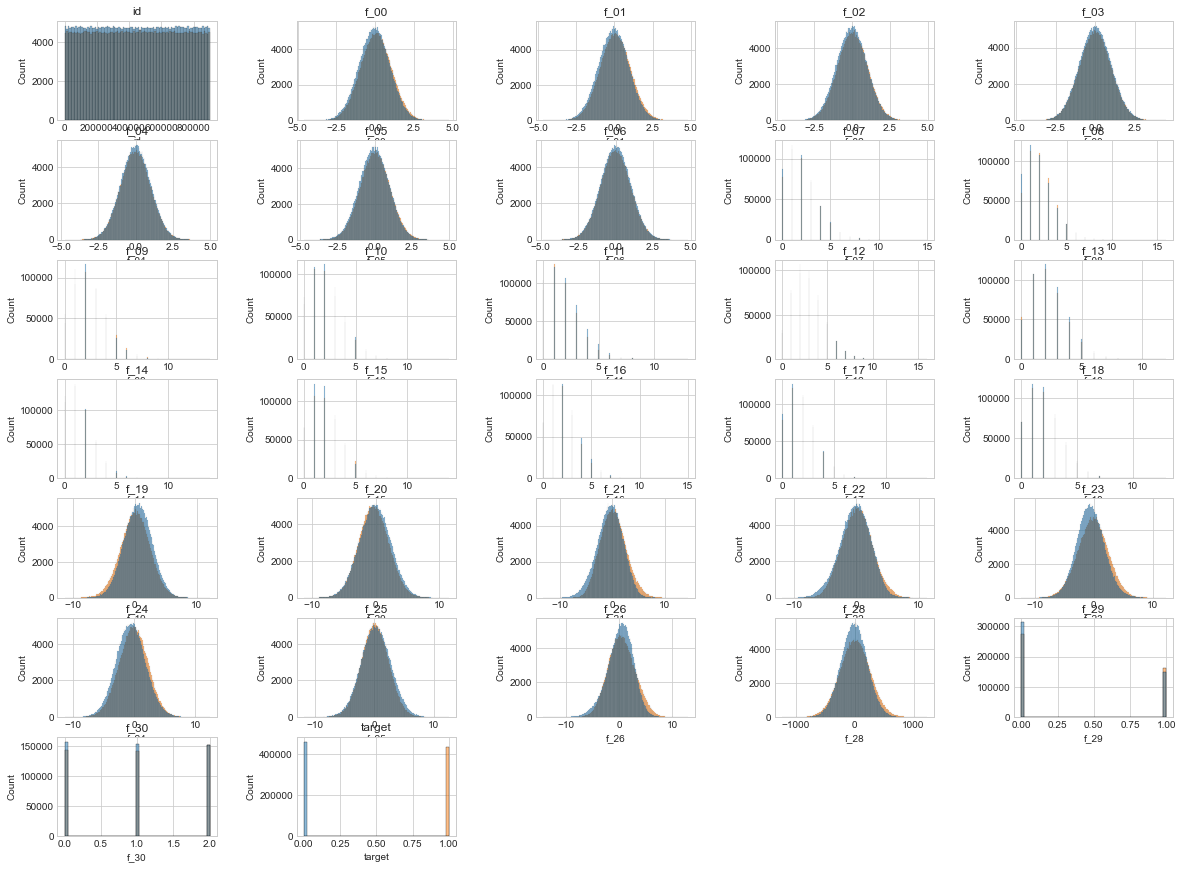

In [27]:
plot_distribution_withtarget(train.drop(columns=['f_27']), 'target')

In [31]:
train['f_30'].dtype == np.int64

True

In [34]:
train = train.drop(columns=['id'])

In [37]:
col_cat = []
for col in train.columns:
    if train[col].dtype == np.int64 and col != 'target':
        col_cat.append(col)

In [38]:
col_cat

['f_07',
 'f_08',
 'f_09',
 'f_10',
 'f_11',
 'f_12',
 'f_13',
 'f_14',
 'f_15',
 'f_16',
 'f_17',
 'f_18',
 'f_29',
 'f_30']

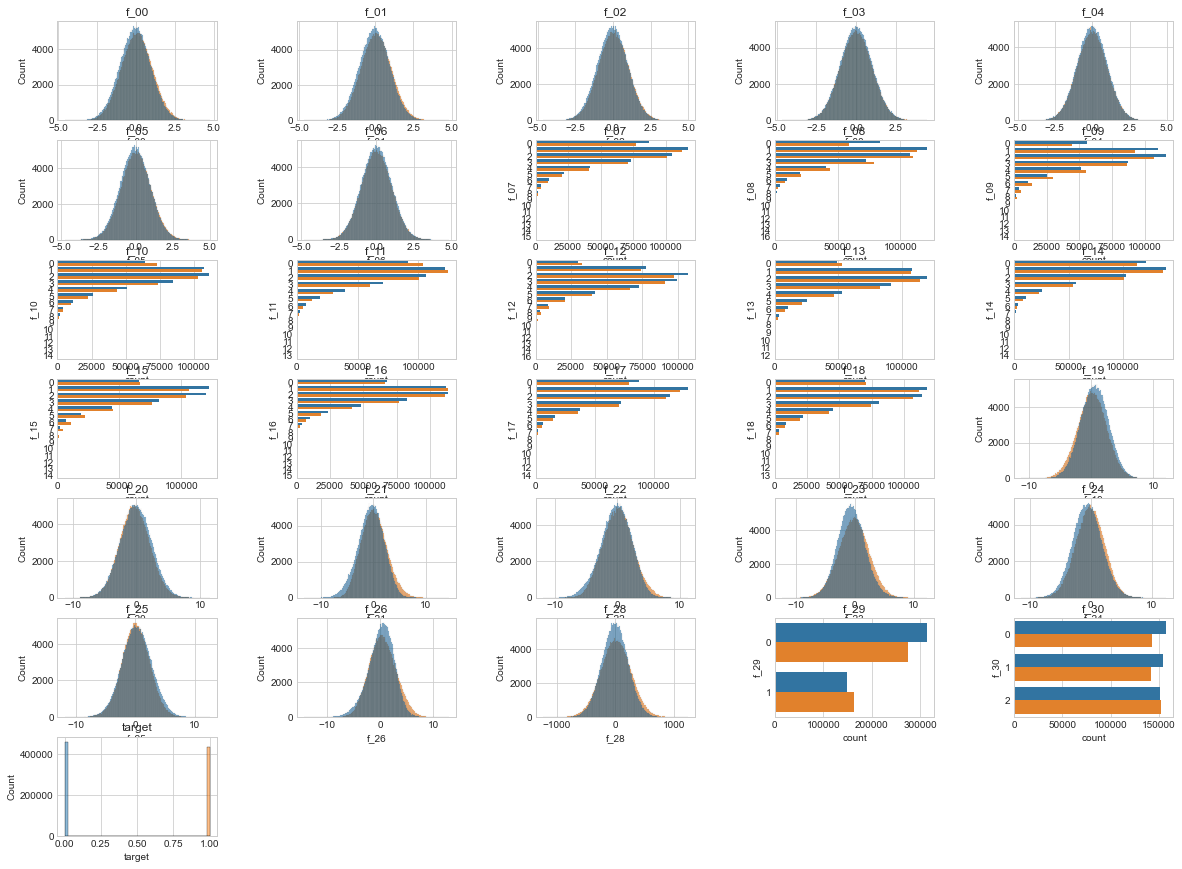

In [39]:
plot_distribution_withtarget(train.drop(columns=['f_27']), 'target', col_cat)

<AxesSubplot:xlabel='count', ylabel='f_07'>

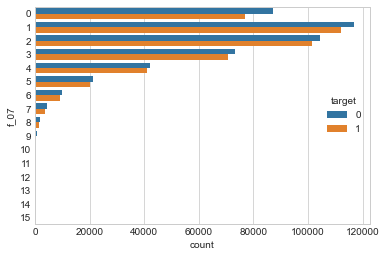

In [41]:
sns.countplot(y='f_07', hue='target', data=train.drop(columns=['f_27'])) 

In [47]:
col_cat

['f_07',
 'f_08',
 'f_09',
 'f_10',
 'f_11',
 'f_12',
 'f_13',
 'f_14',
 'f_15',
 'f_16',
 'f_17',
 'f_18',
 'f_29',
 'f_30']

In [52]:
for col in col_cat:
    tmp = train.groupby(col).agg({'target':['sum','count']}).reset_index()
    print(tmp[tmp[col]>9])

   f_07 target      
           sum count
10   10    178   450
11   11     52   148
12   12     19    46
13   13      4    11
14   14      0     3
15   15      0     3
   f_08 target      
           sum count
10   10     69   321
11   11     23    88
12   12      4    20
13   13      2    16
14   14      0     8
15   16      0     2
   f_09 target      
           sum count
10   10    214   342
11   11     64   103
12   12     19    24
13   13      7     8
14   14      1     1
   f_10 target      
           sum count
10   10    169   314
11   11     55   103
12   12     11    15
13   13      2     4
14   14      1     1
   f_11 target      
           sum count
10   10     77   187
11   11     17    42
12   12      8    15
13   13      1     2
   f_12 target      
           sum count
10   10    422   791
11   11    120   214
12   12     33    55
13   13     14    19
14   14      3     7
15   16      1     1
   f_13 target      
           sum count
10   10     55   145
11   11     1

In [53]:
train.head()

f_00      f_01      f_02      f_03      f_04      f_05      f_06  f_07  \
0 -1.373246  0.238887 -0.243376  0.567405 -0.647715  0.839326  0.113133     1   
1  1.697021 -1.710322 -2.230332 -0.545661  1.113173 -1.552175  0.447825     1   
2  1.681726  0.616746 -1.027689  0.810492 -0.609086  0.113965 -0.708660     1   
3 -0.118172 -0.587835 -0.804638  2.086822  0.371005 -0.128831 -0.282575     3   
4  1.148481 -0.176567 -0.664871 -1.101343  0.467875  0.500117  0.407515     3   

   f_08  f_09  ...      f_22      f_23      f_24      f_25      f_26  \
0     5     1  ... -2.540739  0.766952 -2.730628 -0.208177  1.363402   
1     3     4  ...  2.278315 -0.633658 -1.217077 -3.782194 -0.058316   
2     0     2  ... -1.385775 -0.520558 -0.009121  2.788536 -3.703488   
3     2     1  ...  0.572594 -1.653213  1.686035 -2.533098 -0.608601   
4     3     0  ... -3.912929 -1.430366  2.127649 -3.306784  4.371371   

         f_27        f_28  f_29  f_30  target  
0  ABABDADBAB   67.609153     0     0       0  
1  ACACCADCEB  377.096415     0     0       1  
2  AAAEABCKAD -195.599702     0     2       1  
3  BDBBAACBCB  210.826205     0     0       1  
4  BDBCBBCHFE -217.211798     0     1       1  

[5 rows x 32 columns]

<AxesSubplot:xlabel='f_00', ylabel='f_01'>

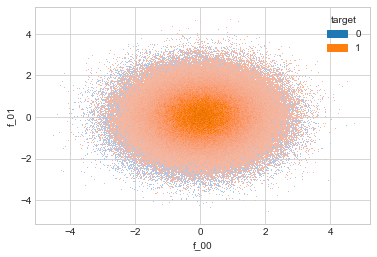

In [54]:
sns.histplot(x='f_00',y='f_01',hue='target',data=train)

In [91]:
def plot_2ddistribution_withtarget(data, target, cols, ncols=5, width=20, height=120, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    nrows = int(np.ceil(len(cols)*(len(cols)-1)/2/ncols))
    idx = 0
    for i,col1 in enumerate(cols):
        print(col1)
        for j,col2 in enumerate(cols):
            if j >= i:  continue
            idx += 1
            ax = fig.add_subplot(nrows, ncols, idx)
            ax.set_title(col1+col2)
            ax.set_aspect('equal')
            g = sns.histplot(data=data, x=col1, y=col2, hue=target)
            ax.legend([],[],frameon=False)

In [138]:
col_cat, col_num = [], []
for col in train.columns:
    if col == 'target':  continue
    if col == 'f_27':  continue
    if train[col].dtype == np.int64:
        col_cat.append(col)
    else:
        col_num.append(col)

In [139]:
len(col_num) * (len(col_num)-1) / 2

120.0

f_00
f_01
f_02
f_03
f_04
f_05
f_06
f_19
f_20
f_21
f_22
f_23
f_24
f_25
f_26
f_28


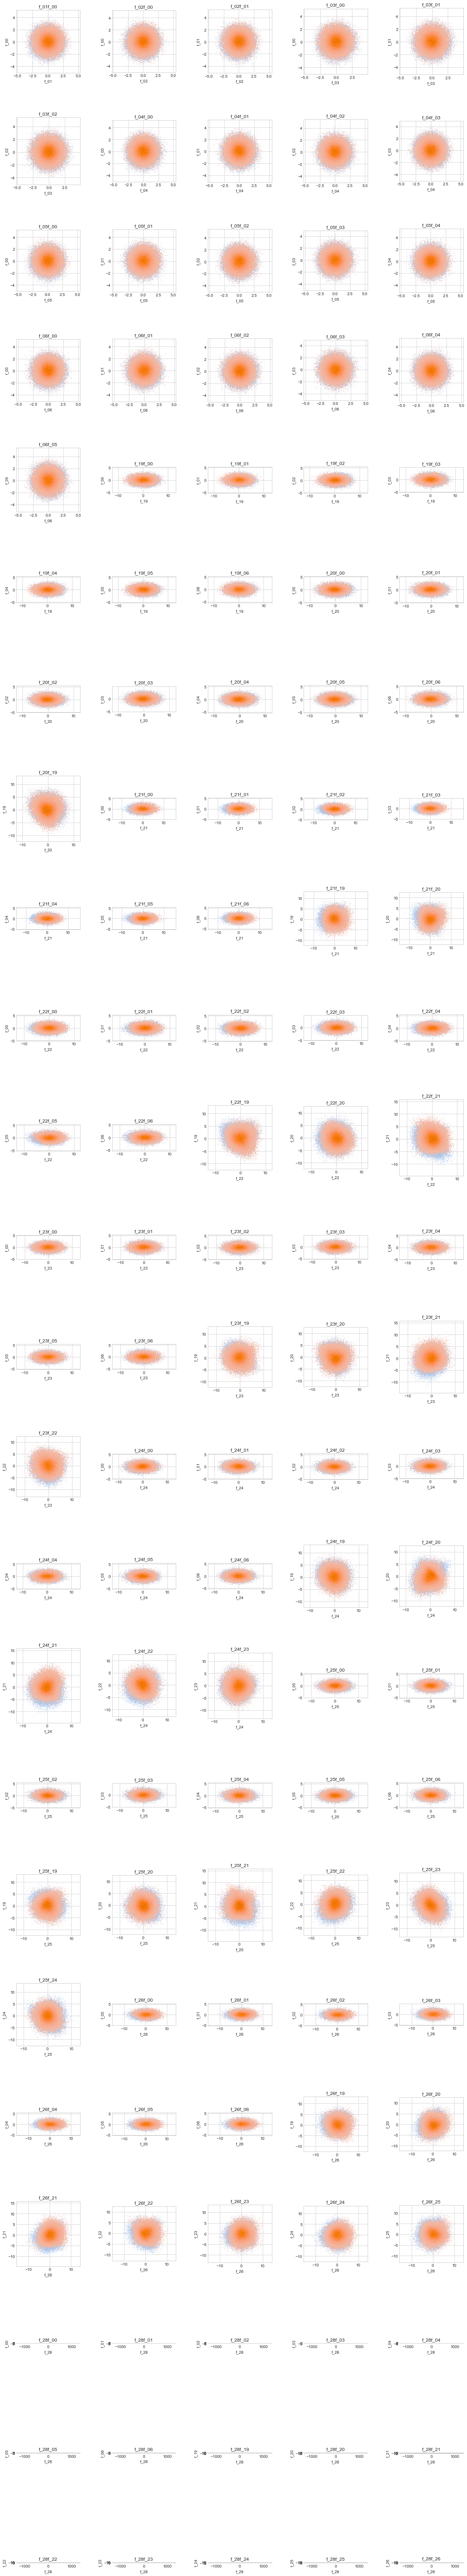

In [95]:
plot_2ddistribution_withtarget(train, 'target', col_num)

In [14]:
from sklearn.svm import LinearSVC

In [15]:
X = train[['f_21','f_02']].values
y = train['target'].values.astype(np.float32)

In [11]:
from sklearn.linear_model import LogisticRegression

In [28]:
clf = LinearSVC(dual=False, verbose=2, C=1e-5, tol=1e-6)
clf.fit(X,y)
clf.coef_, clf.intercept_

[LibLinear]iter  1 act 1.600e-01 pre 1.600e-01 delta 5.357e-02 f 9.000e+00 |g| 5.975e+00 CG   1
iter  2 act 7.697e-03 pre 7.697e-03 delta 5.357e-02 f 8.840e+00 |g| 5.432e-01 CG   2
iter  3 act 4.376e-08 pre 4.376e-08 delta 5.357e-02 f 8.832e+00 |g| 1.288e-03 CG   1
iter  4 act 5.111e-12 pre 5.174e-12 delta 5.357e-02 f 8.832e+00 |g| 3.397e-05 CG   1


(array([[0.05221597, 0.03014032]]), array([-0.01790339]))

In [46]:
clf = LogisticRegression(penalty='none')
clf.fit(X,y)
clf.coef_, clf.intercept_

(array([[0.10740216, 0.06487185]]), array([-0.03832779]))

In [18]:
from sklearn.metrics import accuracy_score

In [47]:
y_pred = clf.predict(X)
accuracy_score(y, y_pred)

0.5407511111111111

(-5.0, 5.0)

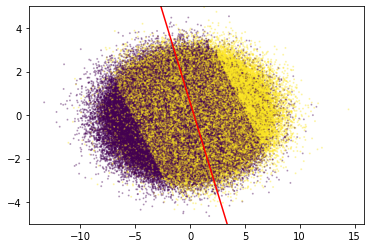

In [49]:
xx1,xx2 = getline(clf)
plt.scatter(X[:,0],X[:,1],s=1,c=y,cmap='viridis',alpha=0.3)
plt.plot(xx1,xx2,'r');plt.ylim([-5,5])

In [21]:
np.where(np.abs(clf.decision_function(X)-1)<=1e-5)

(array([], dtype=int64),)

In [35]:
clf.coef_

array([[0.05221597, 0.03014032]])

In [40]:
def getline(clf):
    x1 = np.arange(-10,10,0.1)
    x2 = (-clf.intercept_ - x1*clf.coef_[0][0])/clf.coef_[0][1]
    return x1,x2

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
clf = RandomForestClassifier(n_estimators=1, max_depth=5)

In [55]:
clf.fit(X,y)
y_pred = clf.predict(X)
accuracy_score(y, y_pred)

0.5288888888888889

In [59]:
def rotate(angle, X):
    theta = angle/180.*np.pi
    M = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])
    return X @ M

In [67]:
Xp = rotate(40, X)

(-14.698424529977586,
 15.843704811566328,
 -5.122909182512901,
 5.442215077968219)

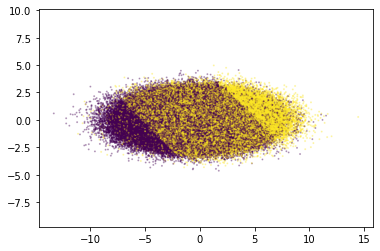

In [65]:
plt.scatter(X[:,0],X[:,1],s=1,c=y,cmap='viridis',alpha=0.3);plt.axis('equal')

(-10.872884830678476,
 12.295384626262171,
 -10.004053692697996,
 10.091451357585655)

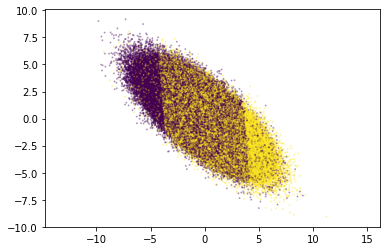

In [68]:
plt.scatter(Xp[:,0],Xp[:,1],s=1,c=y,cmap='viridis',alpha=0.3);plt.axis('equal')

In [69]:
clf.fit(Xp,y)
y_pred = clf.predict(Xp)
accuracy_score(y, y_pred)

0.5402844444444445

In [70]:
clf = RandomForestClassifier(n_estimators=1, max_depth=5)

In [80]:
from xgboost import plot_tree

In [82]:
import graphviz

ModuleNotFoundError: No module named 'graphviz'

ImportError: You must install graphviz to plot tree

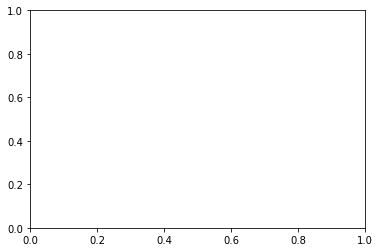

In [81]:
plot_tree(clf)

In [84]:
from sklearn.decomposition import PCA

In [85]:
pca = PCA()

In [97]:
Xtmp = pca.fit_transform(np.hstack([X,(y.reshape(-1,1)-0.5)*10]))

(-6.5840826577229254, 6.983493179096262, -5.083255289014111, 5.405836737257375)

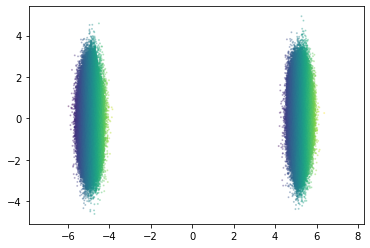

In [100]:
plt.scatter(Xtmp[:,0],Xtmp[:,2],s=1,c=Xtmp[:,1],cmap='viridis',alpha=0.3);plt.axis('equal')

In [102]:
from sklearn.model_selection import cross_validate

In [110]:
clf = cross_validate(RandomForestClassifier(n_estimators=10), X, y, cv=3, scoring='accuracy')

In [111]:
clf

{'fit_time': array([30.79770398, 26.59851027, 30.68391585]),
 'score_time': array([1.78309083, 1.75303388, 1.76977897]),
 'test_score': array([0.5232    , 0.52346333, 0.52327333])}

In [117]:
clf = RandomForestClassifier(n_estimators=1,min_samples_leaf=100).fit(X,y)

In [118]:
prob = clf.predict_proba(X)

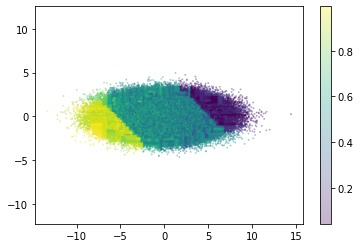

In [119]:
plt.scatter(X[:,0],X[:,1],s=1,c=prob[:,0],cmap='viridis',alpha=0.3);plt.axis('equal');plt.colorbar()

In [120]:
accuracy_score(y, clf.predict(X))

0.5599444444444445

(array([ 12603.,   7136.,  10802., 159583., 275786., 273891., 131956.,
          4697.,   9183.,  14363.]),
 array([0.04166667, 0.13694444, 0.23222222, 0.3275    , 0.42277778,
        0.51805556, 0.61333333, 0.70861111, 0.80388889, 0.89916667,
        0.99444444]),
 <BarContainer object of 10 artists>)

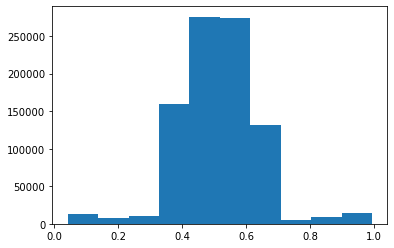

In [122]:
plt.hist(prob[:,0])

In [123]:
X = train[['f_01','f_02']].values
y = train['target'].values.astype(np.float32)

(-5.1570937427188825, 5.290594132589341, -5.122909182512901, 5.442215077968219)

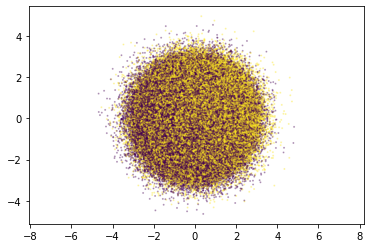

In [124]:
plt.scatter(X[:,0],X[:,1],s=1,c=y,cmap='viridis',alpha=0.3);plt.axis('equal')

In [125]:
clf = RandomForestClassifier(n_estimators=1,min_samples_leaf=100).fit(X,y)
accuracy_score(y, clf.predict(X))

0.5443855555555556

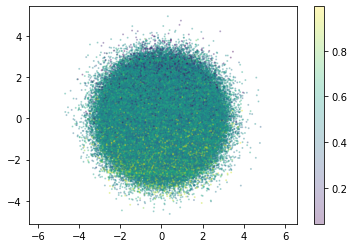

In [126]:
plt.scatter(X[:,0],X[:,1],s=1,c=prob[:,0],cmap='viridis',alpha=0.3);plt.axis('equal');plt.colorbar()

In [127]:
tmp = train.sample(len(train))
X = tmp[['f_21','f_02']].values
y = tmp['target'].values.astype(np.float32)

(-14.698424529977586,
 15.843704811566328,
 -5.122909182512901,
 5.442215077968219)

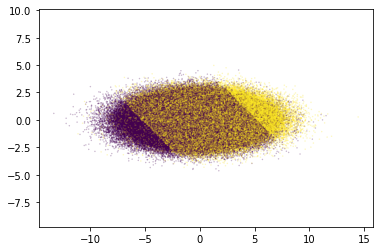

In [129]:
plt.scatter(X[:,0],X[:,1],s=0.2,c=y,cmap='viridis',alpha=0.3);plt.axis('equal')

In [134]:
clf = RandomForestClassifier(n_estimators=1, min_samples_leaf=1000).fit(X,y)
prob = clf.predict_proba(X)

(-14.698424529977586,
 15.843704811566328,
 -5.122909182512901,
 5.442215077968219)

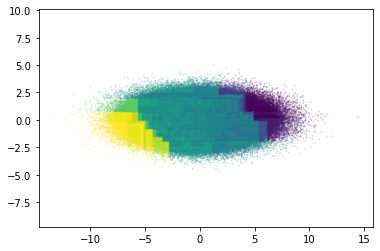

In [135]:
plt.scatter(X[:,0],X[:,1],s=0.2,c=prob[:,0],cmap='viridis',alpha=0.3);plt.axis('equal')

In [136]:
prob_class = np.zeros_like(prob[:,0])
prob_class[prob[:,0]<0.1] = 0
prob_class[ (prob[:,0]>=0.1) & (prob[:,0]<=0.9)] = 1
prob_class[prob[:,0]>0.9] = 2

(-14.698424529977586,
 15.843704811566328,
 -5.122909182512901,
 5.442215077968219)

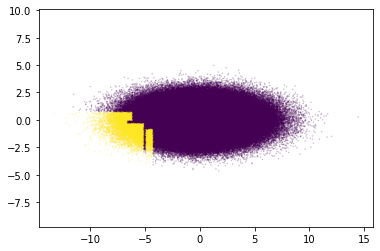

In [137]:
plt.scatter(X[:,0],X[:,1],s=0.2,c=prob_class,cmap='viridis',alpha=0.3);plt.axis('equal')

In [144]:
def plot_2ddistribution_withtarget(data, target, cols, ncols=5, width=20, height=120, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    nrows = int(np.ceil(len(cols)*(len(cols)-1)/2/ncols))
    idx = 0
    for i,col1 in enumerate(cols):
        print(col1)
        for j,col2 in enumerate(cols):
            if j >= i:  continue
            print(col2)
            idx += 1
            ax = fig.add_subplot(nrows, ncols, idx)
            ax.set_title(col1+col2)
            ax.set_aspect('equal')
            ax.scatter(data[col1], data[col2], s=0.2, c=data[target], cmap='viridis',alpha=0.3)
            ax.legend([],[],frameon=False)

In [147]:
len(train)

900000

f_00
f_01
f_00
f_02
f_00
f_01
f_03
f_00
f_01
f_02
f_04
f_00
f_01
f_02
f_03
f_05
f_00
f_01
f_02
f_03
f_04
f_06
f_00
f_01
f_02
f_03
f_04
f_05
f_19
f_00
f_01
f_02
f_03
f_04
f_05
f_06
f_20
f_00
f_01
f_02
f_03
f_04
f_05
f_06
f_19
f_21
f_00
f_01
f_02
f_03
f_04
f_05
f_06
f_19
f_20
f_22
f_00
f_01
f_02
f_03
f_04
f_05
f_06
f_19
f_20
f_21
f_23
f_00
f_01
f_02
f_03
f_04
f_05
f_06
f_19
f_20
f_21
f_22
f_24
f_00
f_01
f_02
f_03
f_04
f_05
f_06
f_19
f_20
f_21
f_22
f_23
f_25
f_00
f_01
f_02
f_03
f_04
f_05
f_06
f_19
f_20
f_21
f_22
f_23
f_24
f_26
f_00
f_01
f_02
f_03
f_04
f_05
f_06
f_19
f_20
f_21
f_22
f_23
f_24
f_25
f_28
f_00
f_01
f_02
f_03
f_04
f_05
f_06
f_19
f_20
f_21
f_22
f_23
f_24
f_25
f_26


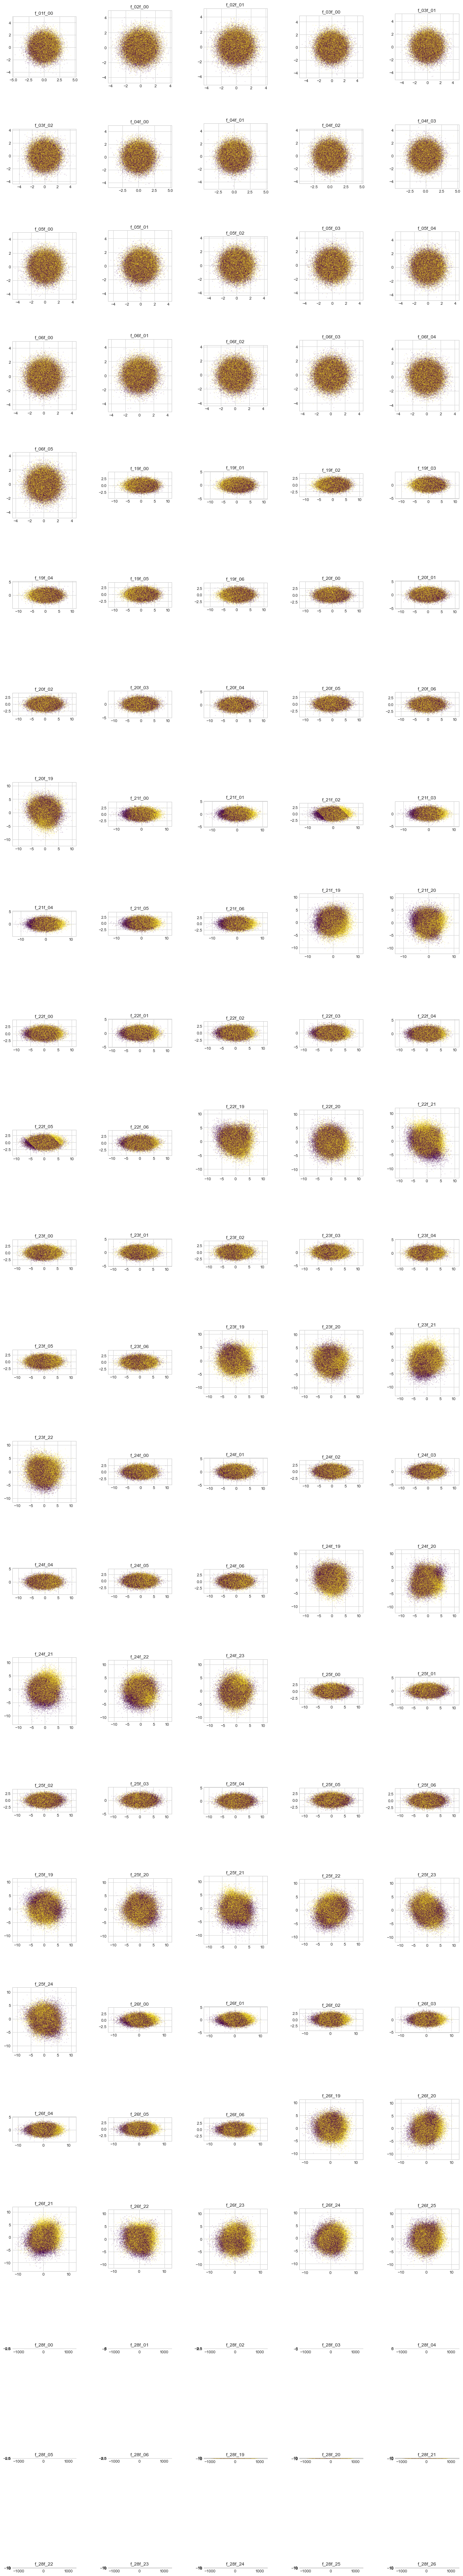

In [152]:
plot_2ddistribution_withtarget(train.sample(100000), 'target', col_num)

In [153]:
train['f_27']

0         ABABDADBAB
1         ACACCADCEB
2         AAAEABCKAD
3         BDBBAACBCB
4         BDBCBBCHFE
             ...    
899995    BABBCBBBED
899996    BBBGBBDQBE
899997    AEBEDBBHBA
899998    ADBAAADDAE
899999    BCAACADSCE
Name: f_27, Length: 900000, dtype: object

In [159]:
train['f_27'].str.get(0).apply(ord) - ord('A')

0         0
1         0
2         0
3         1
4         1
         ..
899995    1
899996    1
899997    0
899998    0
899999    1
Name: f_27, Length: 900000, dtype: int64

In [160]:
for i in range(10):
    print(f'Position {i}')
    tg = train.groupby(train.f_27.str.get(i))
    temp = pd.DataFrame({'size': tg.size(), 'probability': tg.target.mean().round(2)})
    print(temp)
    print()

Position 0
        size  probability
f_27                     
A     451207         0.54
B     448793         0.44

Position 1
        size  probability
f_27                     
A     144762         0.58
B     245160         0.48
C     225931         0.49
D     149579         0.45
E      78807         0.43
F      35487         0.42
G      13713         0.41
H       4647         0.40
I       1361         0.40
J        410         0.38
K        113         0.39
L         25         0.28
M          3         0.67
N          2         1.00

Position 2
        size  probability
f_27                     
A     297840         0.53
B     602160         0.46

Position 3
        size  probability
f_27                     
A     160839         0.57
B     237218         0.48
C     210015         0.48
D     143633         0.45
E      81662         0.43
F      39504         0.44
G      17121         0.45
H       6473         0.47
I       2379         0.48
J        772         0.51
K        254     

In [163]:
import string
string.ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [161]:
for c in string.ascii_uppercase:
    print(f'letter {c}')
    tg = train.groupby(train.f_27.str.count(c))
    temp = pd.DataFrame({'size': tg.size(), 'probability': tg.target.mean().round(2)})
    print(temp)
    print()

0         4
1         3
2         5
3         2
4         0
         ..
899995    1
899996    0
899997    2
899998    5
899999    3
Name: f_27, Length: 900000, dtype: int64